In [1]:
import sys
sys.path.append("../../")

In [15]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ConstantKernel as C
import matplotlib.pyplot as plt
from core.vhgpr import VHGPR
from oned import S, f, r
from core.inputs import GaussianInputs
import time

In [16]:
plt.rcParams.update({'font.size': 16})

In [17]:
def plot_prediction(vhgp):
    x = np.linspace(0, 10, 100).reshape(-1 ,1)
    truefuncf = f(x)
    truefuncg = r(x)
    predresults = vhgp.predict(x)
    predfuncf = predresults[0]
    predfuncg = np.sqrt(np.exp(predresults[2]))
    
    plt.figure(figsize = (4,4))
    plt.plot(x, truefuncf, color='black')
    plt.plot(x, predfuncf, color='tab:red')
    plt.plot(vhgp.X_train_, vhgp.y_train_, 'o', color='tab:orange')
    plt.xlabel('$x$')
    plt.ylabel('mean')
    plt.show()

    plt.figure(figsize = (4,4))
    plt.plot(x, truefuncg, color='black')
    plt.plot(x, predfuncg, color='tab:red')
    plt.xlabel('$x$')
    plt.ylabel('std')
    plt.show()
    plt.show()

In [18]:
dim = 1                                 
mean, cov = 5 * np.ones(dim), np.eye(dim) 
domain = np.array([[0,10]]*dim)
inputs = GaussianInputs(mean, cov, domain, dim)

In [19]:
np.random.seed(0)
DX = inputs.sampling(100)
DY = S(DX).reshape(-1)

In [20]:
kernelf = C(100.0, (1e-1, 1e3)) * RBF(5, (1e-1, 1e1)) 
kernelg = C(2.0, (1e-1, 2*1e1)) * RBF(5, (1e-1, 1e2))
vhgpr = VHGPR(kernelf, kernelg)
vhgpr.fit(DX, DY)

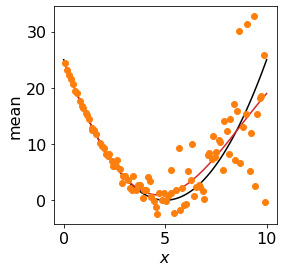

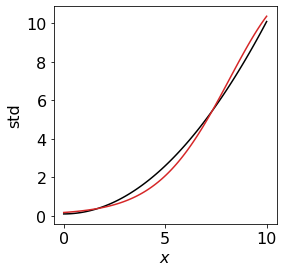

In [21]:
plot_prediction(vhgpr)